---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives a data description about the names of the columns, their data types and how many null values we have. Fortunately, there are no null values. Although, It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before computing any statistics on the data,necessary data preparation and conversion can be done

* As seen from the info() method there's no null values hence no missing data in the dataset

## Data Preparation and Feature Engineering

### Checking Target Variable

In [5]:
df['booking_complete'].unique()

array([0, 1])

In [6]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

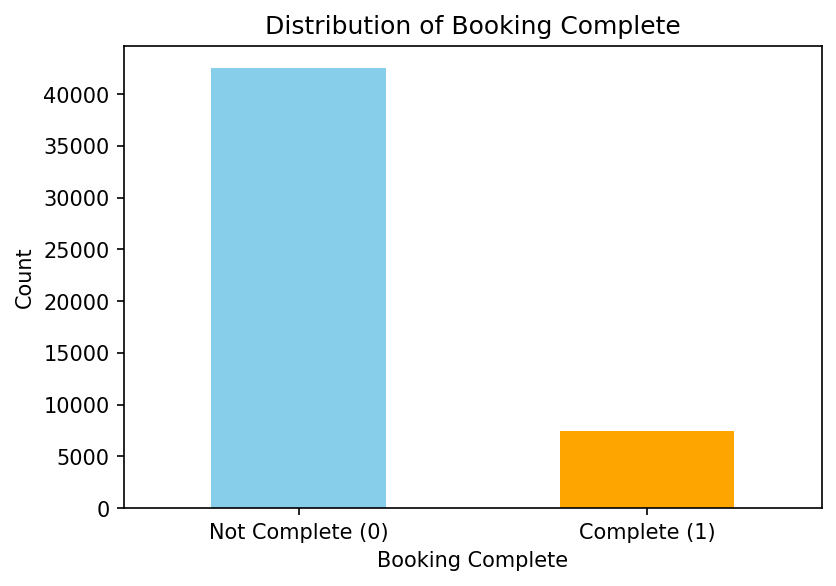

In [7]:
plt.figure(figsize=(6,4), dpi = 150)
df['booking_complete'].value_counts().plot(kind='bar', color=['skyblue','orange'])
plt.title('Distribution of Booking Complete')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.xticks(ticks = [0,1], labels=['Not Complete (0)', 'Complete (1)'], rotation = 0)
plt.show()

### Note on Imbalanced Target Variable

The target variable `booking_complete` is highly imbalanced, as observed from the distribution above:

- Class `0` (Not Complete): 42,522 instances
- Class `1` (Complete): 7,478 instances

This imbalance can lead to a biased model that might perform well on the majority class but poorly on the minority class. It's crucial to address this imbalance to build a more robust and generalizable model. Techniques like oversampling the minority class, undersampling the majority class, or using Synthetic Minority Over-sampling Technique (SMOTE) can be considered.

Additionally, evaluation metrics like Precision, Recall, F1-score, and AUC-ROC should be used alongside Accuracy to get a more holistic view of the model's performance.


### Note on Data Conversion/Feature Engineering for Categorical Features

Machine learning algorithms require numerical input and output variables. Features like `flight_day`, `trip_type`, `sales_channel`, and others are categorical in nature and are represented as text or string data types. These need to be converted into a numerical format for the algorithms to make sense of them.

#### Methods for Conversion:
1. **One-Hot Encoding**: Useful for nominal variables where no ordinal relationship exists.
2. **Label Encoding**: Can be used for ordinal variables where some natural order is present.
3. **Target Encoding**: Useful when you want to capture the relationship between the feature and the target variable without increasing dimensionality but might lead to data leakage if not done carefully.


- In this binary classification problem, the primary algorithms under consideration are tree-based models like Decision Trees, Random Forests, and Gradient Boosting, as well as Logistic Regression. Given the nature of these algorithms, Label Encoding emerges as a suitable choice for data conversion for several compelling reasons:

1. **Tree-Based Compatibility**: Tree-based algorithms like Decision Trees and Random Forests are non-linear models that can handle integer-encoded categorical variables without assuming ordinality. The trees can split the data based on the integer values, making Label Encoding a good fit.

2. **Dimensionality**: Unlike One-Hot Encoding, Label Encoding does not increase the feature space, making the model less complex and faster to train. This is particularly beneficial when dealing with large datasets.

3. **Simplicity and Efficiency**: Label Encoding is computationally less expensive than other encoding methods like One-Hot Encoding or Target Encoding, making it a quick and effective way to transform data.

4. **Logistic Regression Adaptability**: While Logistic Regression typically prefers One-Hot Encoding for nominal variables, it can still work effectively with Label Encoding when the cardinality of the categorical variable is low, or when the dataset is large enough to mitigate the ordinal assumptions.

5. **Feature Importance**: Label Encoding allows for a straightforward interpretation of feature importance in tree-based algorithms, making it easier to understand which features are contributing most to the predictive power of the model which is one of the major objectives of this project.

By choosing Label Encoding, I aim to build a model that is not only accurate but also computationally efficient and interpretable, aligning well with the objective of the project.



- **Flight Day Feature Conversion**

In [8]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [10]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

- **Trip Type Feature Conversion**

In [11]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [12]:
trip_map = {
    'RoundTrip': 1,
    'CircleTrip': 2,
    'OneWay': 3
}
df['trip_type'] = df['trip_type'].map(trip_map)
df['trip_type'].unique()

array([1, 2, 3])

In [13]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

- **Sale Channel Feature Conversion**

In [14]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [15]:
df['sales_channel'] = df['sales_channel'].map({'Internet': 1, 'Mobile': 2})
df['sales_channel'].unique()

array([1, 2])

#### Dataset Description - Notable Features

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
sales_channel,50000.0,1.112360,0.315812,1.00,1.00,1.00,1.00,2.0
trip_type,50000.0,1.017800,0.181559,1.00,1.00,1.00,1.00,3.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0


* num_passengers
    * Wide range from 1 to 9, could indicate different types of trips (solo, family, group).

* purchase_lead
    * High variance in lead time (0 to 867 days), may require outlier treatment.

* length_of_stay
    * Significant outliers with max stay of 778 days, needs further investigation.

* wants_extra_baggage
    * About 67% customers want extra baggage, potential for revenue generation.

* booking_complete
    * Only 15% bookings are complete, indicating an imbalanced dataset.


#### Route feature encode

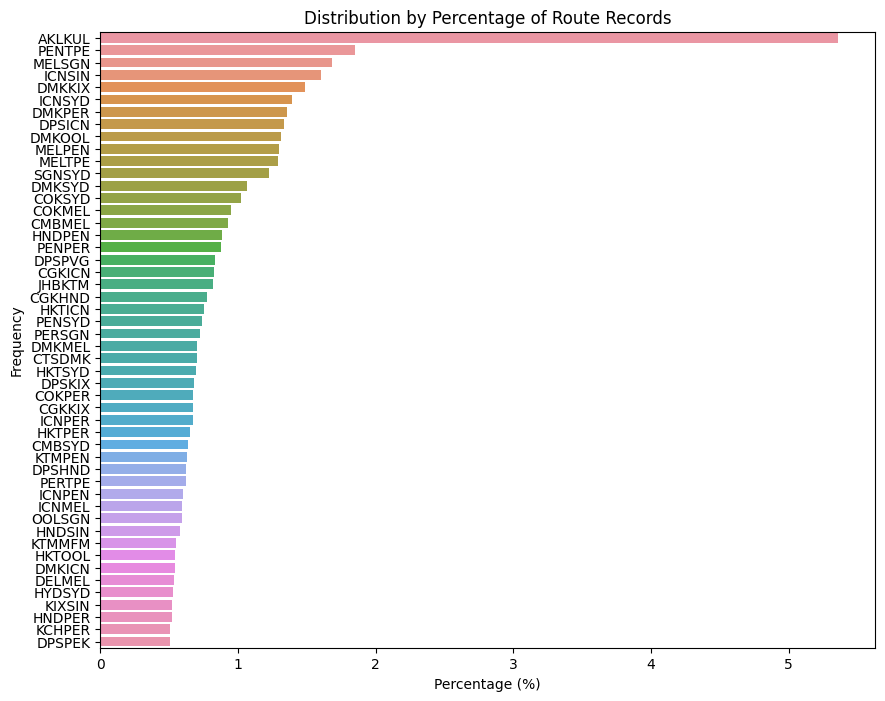

In [17]:
#route Count 
route_count = df['route'].value_counts()
route_by_percent = (route_count/len(df)) * 100
#Set figure size for better readability
plt.figure(figsize = (10, 8), dpi=100)

#A barplot visualizing the route records/percentage in the dataset
sns.barplot(x=route_by_percent[route_by_percent >= 0.5].values, y =route_by_percent[route_by_percent >= 0.5].index)
plt.xlabel('Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution by Percentage of Route Records')

plt.show()

In [18]:
df['route_encode'] = df['route'].map(route_by_percent)

def route_encode(value):
    if 0 <= value <= 0.9:
        return 1
    elif 1 <= value <= 2:
        return 2
    else:
        return 3
    
df['route_encode'] = df['route_encode'].apply(route_encode)

#change the data type to an integer
df['route_encode'] = df['route_encode'].astype('int64')

**Percentage-Based Encoding of 'Route' Feature**

The `route` feature, with its high cardinality (799 unique routes), is encoded based on percentage occurrence in the dataset. This method effectively addresses varied route frequencies and simplifies the feature space for modeling.

**Encoding Strategy:**
- Routes are categorized into three groups:
  - `1`: Routes comprising 0 to 0.9% of the dataset.
  - `2`: Routes representing 1% to 2%.
  - `3`: Routes exceeding 2% of the total dataset.

**Rationale:**
- **Dimensionality Reduction**: Reduces the number of categories, mitigating computational complexity and overfitting risk.
- **Balanced Representation**: Reflects the distributional nature of the data, with categories like 'AKLKUL' showing significant frequency as seen in the bar plot above.
- **Enhanced Interpretability**: The encoding preserves the interpretability of route frequencies in relation to their impact on flight bookings.

This encoding approach ensures that the model's input accurately represents the varying significance of routes in the dataset, enhancing the model's predictive capability.


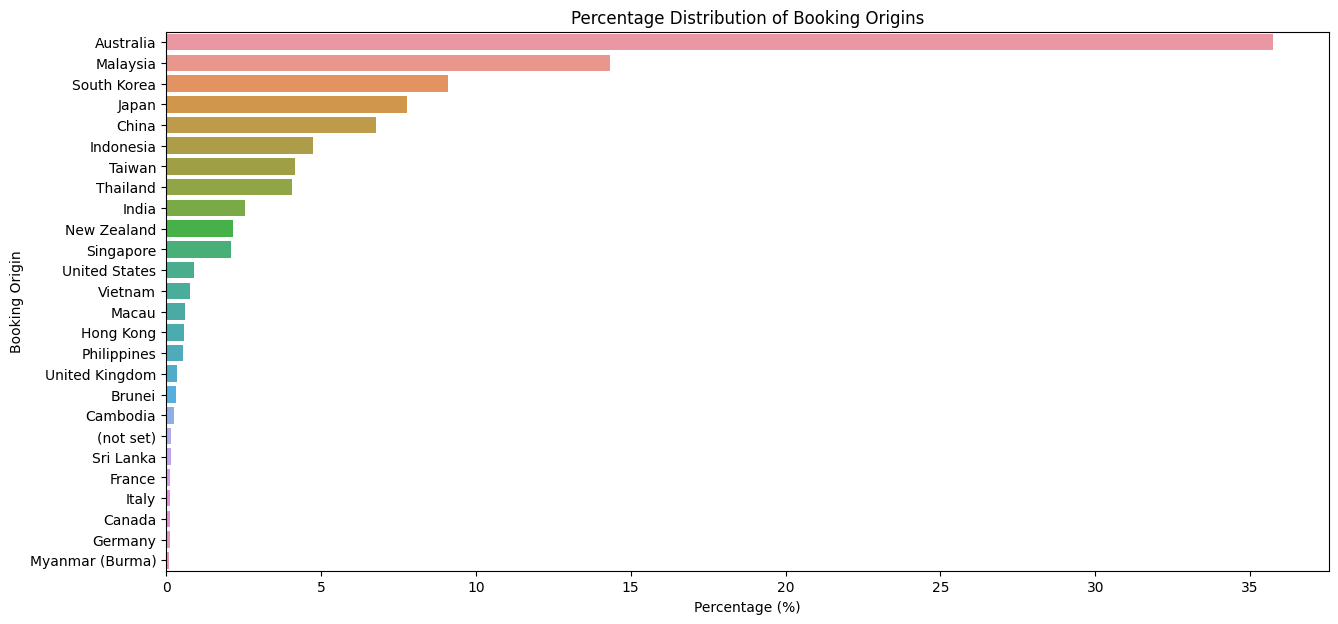

In [19]:
#Booking Origin Count 
booking_orign_count = df['booking_origin'].value_counts()
origin_by_percent = booking_orign_count/len(df) * 100


#Set figure size for better readability
plt.figure(figsize = (15, 7), dpi=100)

sns.barplot(x=origin_by_percent[origin_by_percent >= 0.1 ].values, y =origin_by_percent[origin_by_percent >= 0.1 ].index)
plt.xlabel('Percentage (%)')
plt.ylabel('Booking Origin')
plt.title('Percentage Distribution of Booking Origins')

plt.show()

In [20]:
#function to apply the encoding 
def booking_origin_encode(value):
    if 0 <= value <= 0.9:
        return 1
    elif 1 <= value <= 10:
        return 2
    else:
        return 3
    
# Apply the encoding to the 'booking_origin'
df['booking_origin_encode'] = df['booking_origin'].map(origin_by_percent)
df['booking_origin_encode'] = df['booking_origin_encode'].apply(booking_origin_encode)

In [21]:
#change the data type to an integer
df['booking_origin_encode'] = df['booking_origin_encode'].astype('int64')

**Encoding the 'Booking Origin' Feature**

The `booking_origin` feature in the dataset represents the countries from which bookings originate. An analysis of the value counts of this feature reveals a diverse range of frequencies, with Australia being the most predominant origin. To effectively incorporate this feature into our predictive model, especially considering its high cardinality and varied occurrence frequencies, a custom encoding strategy is devised.

**Encoding Strategy:**

- **Objective:** Reduce the complexity of the feature while preserving its essential information and ensuring it contributes meaningfully to the model.

- **Method:**
    - Booking origins are categorized based on their percentage occurrence in the dataset:
      - `1`: Origins contributing 0 to 0.9% of total bookings.
      - `2`: Origins with 1% to 10% of total bookings.
      - `3`: Origins representing more than 10% of total bookings.
**Rationale:**

- **Manageable Cardinality:** This approach significantly reduces the number of unique categories, addressing the high cardinality issue.
- **Reflecting Real-World Significance:** The encoding mirrors the real-world scenario where certain origins contribute more to the booking count, particularly Malaysia and Australia, which stands out with the highest frequency.

This tailored encoding approach is expected to enhance the performance and interpretability of the tree-based algorithms used for the classification task, focusing on the most impactful aspects of the `booking_origin` feature.


In [22]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_encode,booking_origin_encode
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,2
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,2
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,2
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,2
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,2


## Exploratory Data Analysis (EDA)

In [23]:
df2 = df.drop(['route', 'booking_origin'], axis = 1)

In [24]:
df2[['sales_channel','trip_type', 'route_encode', 'booking_origin_encode', 'flight_day']]

,sales_channel,trip_type,route_encode,booking_origin_encode,flight_day
0,1,1,1,2,6
1,1,1,1,2,6
2,1,1,1,2,3
3,1,1,1,2,6
4,1,1,1,2,3
...,...,...,...,...,...
49995,1,1,1,3,6
49996,1,1,1,3,7
49997,1,1,1,3,6
49998,1,1,1,3,1


In [25]:
df2['booking_origin_encode'] = df2['booking_origin_encode'].astype('object')
df2['sales_channel'] = df2['sales_channel'].astype('object')
df2['route_encode'] = df2['route_encode'].astype('object')
df2['flight_day'] = df2['flight_day'].astype('object')
df2['trip_type'] = df2['trip_type'].astype('object')

In [26]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


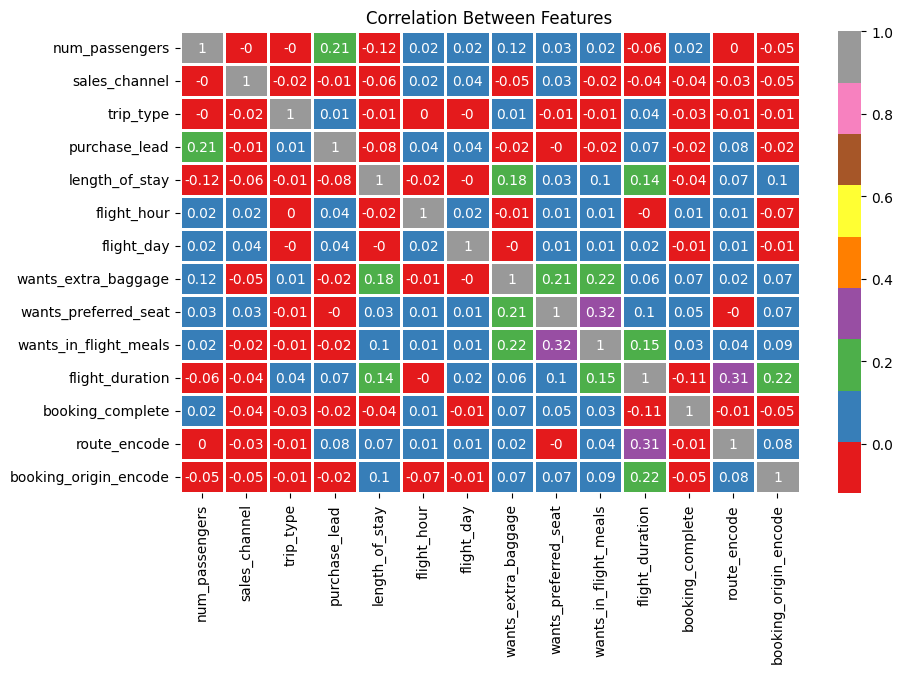

In [27]:
correlation_matrix = np.round(df2.corr(), 2)
plt.figure(figsize=(10,6), dpi =100)
sns.heatmap(correlation_matrix, cmap = 'Set1', linewidths=2, annot=True)
plt.title('Correlation Between Features')
plt.show()

**Correlation Analysis and Further Investigations**

The correlation analysis of the dataset reveals several key insights, highlighting areas for deeper exploration:

**Key Observations:**
1. **Low Correlation with Target:** Most features exhibit low linear correlation with the target variable `booking_complete`, suggesting that no single feature dominantly influences the booking decision.
2. **Interlinked Customer Preferences:** Features like `wants_extra_baggage`, `wants_preferred_seat`, and `wants_in_flight_meals` show moderate correlations with each other, indicating related customer preferences.
3. **Significant Correlations:** `route_encode` and `booking_origin_encode` show notable correlations with `flight_duration`, suggesting a relationship between the route/origin and the duration of the flight.

**Further Investigations:**
1. **Combined Influence on Target:** Explore how combined customer preferences (baggage, seat, meals) impact booking completion.
2. **Route and Origin Analysis:** Investigate the influence of  route and booking origin on the target, possibly in relation to flight duration.
3. **Group Booking Dynamics:** Examine how `num_passengers` correlates with features like `purchase_lead` and `wants_extra_baggage` for insights into group booking behavior.


*Conclusion: The correlation analysis offers initial insights into the dataset, revealing some interesting relationships between features. However, the intricate nature of customer behavior and booking patterns calls for a more comprehensive analytical approach. Delving deeper into the data will enable us to uncover complex interactions and non-linear dependencies that may not be evident from correlation alone. Ultimately, developing a predictive model will be crucial to identify and quantify the impact of specific features on the likelihood of booking completion, providing a clearer understanding of the factors driving customer decisions.*


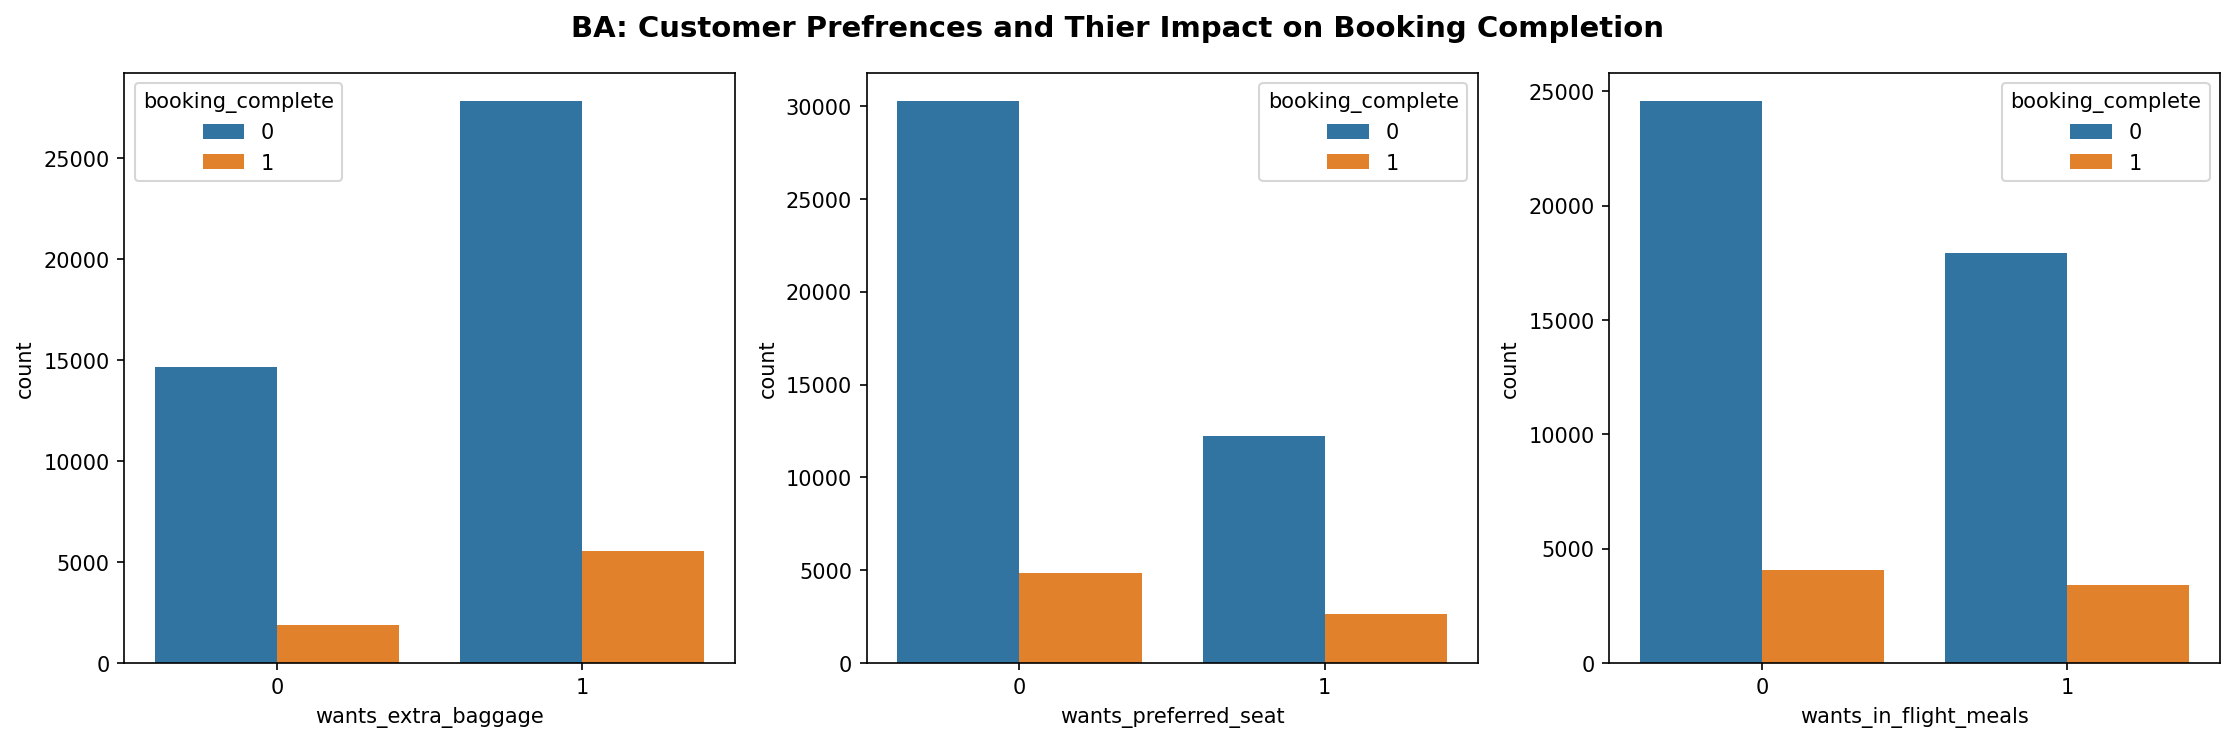

In [28]:
fig,ax = plt.subplots(nrows = 1, ncols =3, figsize=(15,5), dpi=150)

#plotting individual count plots
sns.countplot(data=df2, x= 'wants_extra_baggage', ax = ax[0], hue ='booking_complete')
sns.countplot(data=df2, x= 'wants_preferred_seat', ax = ax[1], hue ='booking_complete')
sns.countplot(data=df2, x= 'wants_in_flight_meals', ax =ax[2], hue ='booking_complete')

fig.suptitle('BA: Customer Prefrences and Thier Impact on Booking Completion', fontsize=14, fontweight='bold')
plt.tight_layout()
# plt.legend(loc=0)
plt.show()


In [29]:
df2.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'route_encode', 'booking_origin_encode'],
      dtype='object')

In [30]:
df2[['num_passengers', 'purchase_lead']]

,num_passengers,purchase_lead
0,2,262
1,1,112
2,2,243
3,1,96
4,2,68
...,...,...
49995,2,27
49996,1,111
49997,1,24
49998,1,15


Text(0.5, 1.0, 'Purchase Lead time across Passenger Count')

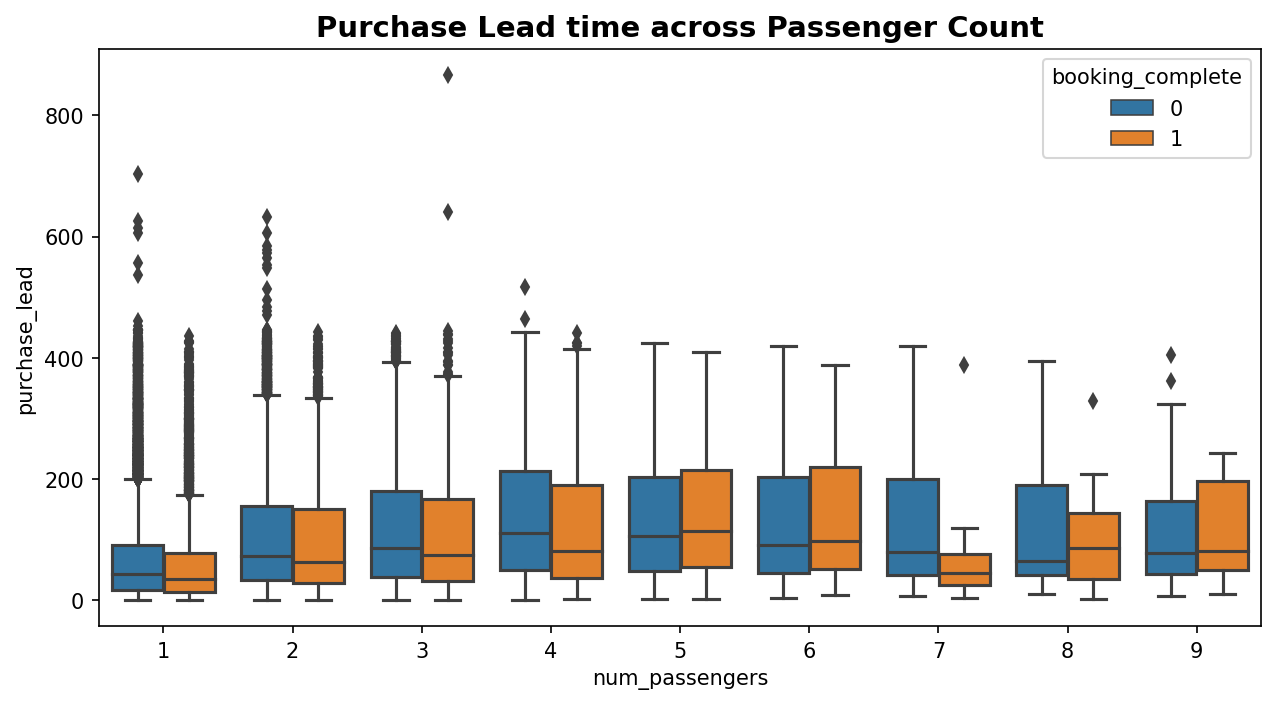

In [31]:
plt.figure(figsize=(10,5), dpi=150)

sns.boxplot(data=df2, x = 'num_passengers', y='purchase_lead', hue ='booking_complete')
plt.title("Purchase Lead time across Passenger Count", fontsize=14, fontweight='bold')

**The boxplot illustrates the distribution of purchase lead times across different passenger counts, with a color distinction between completed and incomplete bookings.**


* The Interquartile range(IQR) is generally similar between completed and incompleted bookings for each passenger number, indicatiing similar variability with both outcomes.
* There are outliers present in both completed and incomplete bookings, particularly in groups of 1 to 4 passengers, indicating some passengers book flights much earlier than the typical lead times.Completed bookings between 1 to 4 passengers tend to have longer purchase lead times, suggesting that bookings made well in advance are more likely to be completed.

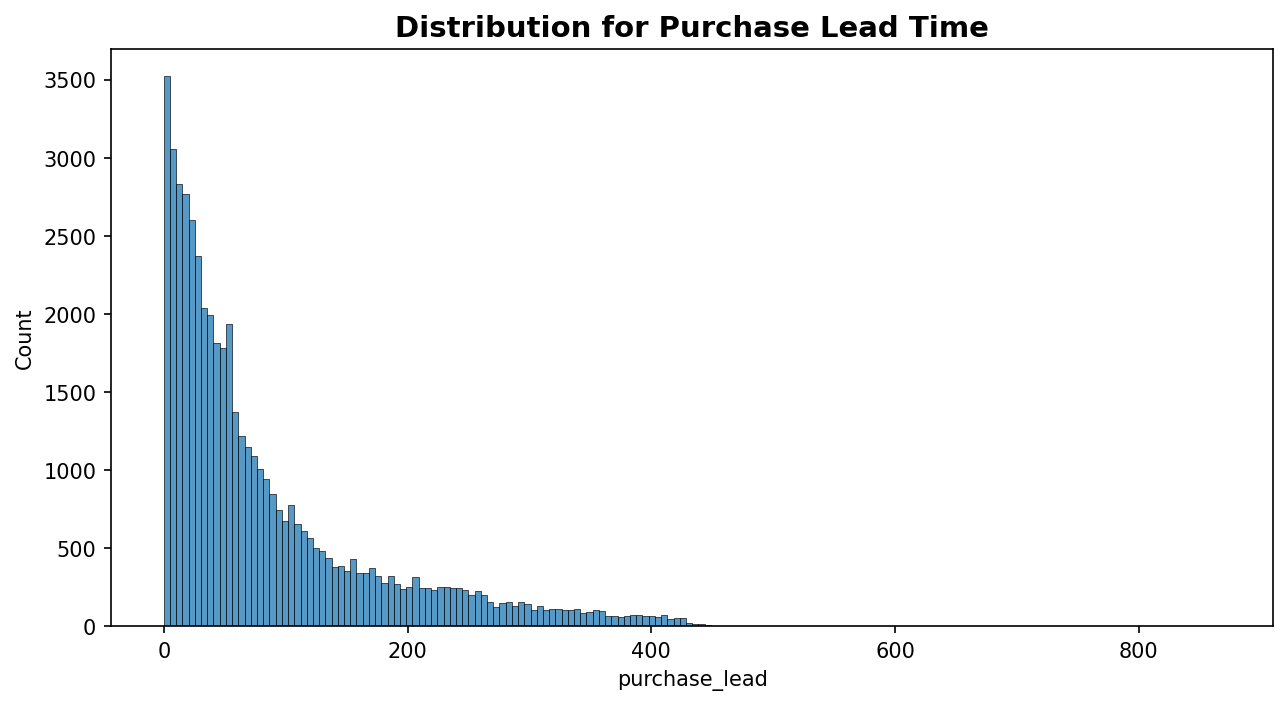

In [32]:
plt.figure(figsize=(10,5), dpi=150)

sns.histplot(data=df2, x = 'purchase_lead')
plt.title("Distribution for Purchase Lead Time", fontsize=14, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Purchase Lead time Vs Trip Type')

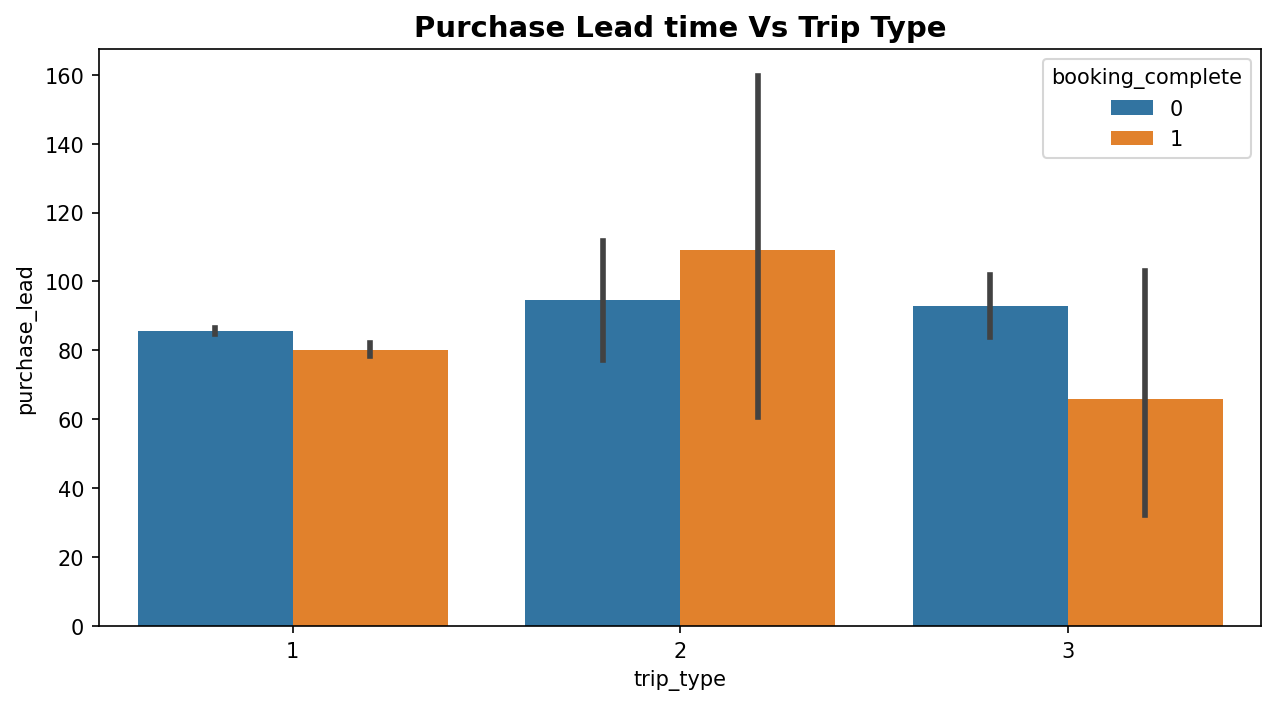

In [33]:
plt.figure(figsize=(10,5), dpi=150)

sns.barplot(data=df2, x = 'trip_type', y='purchase_lead', hue ='booking_complete')
plt.title("Purchase Lead time Vs Trip Type", fontsize=14, fontweight='bold')

In [34]:
df2.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'route_encode', 'booking_origin_encode'],
      dtype='object')

## Data Modelling

In [35]:
df2

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_encode,booking_origin_encode
0,2,1,1,262,19,7,6,1,0,0,5.52,0,1,2
1,1,1,1,112,20,3,6,0,0,0,5.52,0,1,2
2,2,1,1,243,22,17,3,1,1,0,5.52,0,1,2
3,1,1,1,96,31,4,6,0,0,1,5.52,0,1,2
4,2,1,1,68,22,15,3,1,0,1,5.52,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0,1,3
49996,1,1,1,111,6,4,7,0,0,0,5.62,0,1,3
49997,1,1,1,24,6,22,6,0,0,1,5.62,0,1,3
49998,1,1,1,15,6,11,1,1,0,1,5.62,0,1,3


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X = df2.drop('booking_complete', axis =1)
y = df2['booking_complete']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Baseline Model

In [39]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(class_weight='balanced')

scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)
log.fit(scaled_Xtrain, y_train)

LogisticRegression(class_weight='balanced')

In [115]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, fbeta_score

Baseline Model- Logistic Regression 

              precision    recall  f1-score   support

           0       0.90      0.59      0.71     12803
           1       0.20      0.60      0.30      2197

    accuracy                           0.59     15000
   macro avg       0.55      0.59      0.51     15000
weighted avg       0.79      0.59      0.65     15000



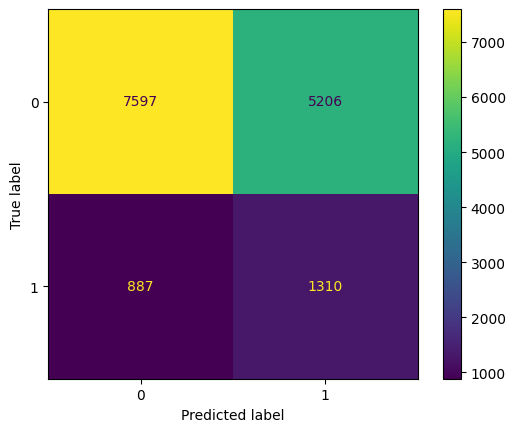

In [41]:
print('Baseline Model- Logistic Regression \n')
pred_log = log.predict(scaled_Xtest)
print(classification_report(y_test, pred_log))
ConfusionMatrixDisplay.from_estimator(log, scaled_Xtest, y_test)
plt.show()

### Random Forest

In [42]:
df2

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_encode,booking_origin_encode
0,2,1,1,262,19,7,6,1,0,0,5.52,0,1,2
1,1,1,1,112,20,3,6,0,0,0,5.52,0,1,2
2,2,1,1,243,22,17,3,1,1,0,5.52,0,1,2
3,1,1,1,96,31,4,6,0,0,1,5.52,0,1,2
4,2,1,1,68,22,15,3,1,0,1,5.52,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0,1,3
49996,1,1,1,111,6,4,7,0,0,0,5.62,0,1,3
49997,1,1,1,24,6,22,6,0,0,1,5.62,0,1,3
49998,1,1,1,15,6,11,1,1,0,1,5.62,0,1,3


In [45]:
y.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
bookings = y.value_counts()
complete_book = bookings.iloc[1]
incomplete = bookings.iloc[0]

In [57]:
# weight_for_incomplete_booking = (1.0/incomplete) * (complete_book+incomplete) / 2.0
# weight_for_complete_booking = (1.0/ complete_book) * (complete_book+incomplete) / 2.0

In [56]:
total_instances = 50000
weight_for_class_0 = total_instances / 42522
weight_for_class_1 = total_instances / 7478

# Normalize weights (optional)
min_weight = min(weight_for_class_0, weight_for_class_1)
weight_for_class_0 /= min_weight
weight_for_class_1 /= min_weight

custom_weights = {0: weight_for_class_0, 1: weight_for_class_1}

In [58]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101, shuffle= True, stratify=y)
# Spliting the remaining data(X_other,y_other) in half, evaluation and testing data
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101, shuffle= True, stratify=y_other)

In [59]:
from sklearn.utils import resample

In [60]:
#Separate the majority and minority classes in the training set
X_train_majority = X_train[y_train == 0]
X_train_minority = X_train[y_train == 1]

# Downsample the majority class
X_train_majority_downsampled = resample(X_train_majority,
                                       replace=False,
                                       n_samples=len(X_train_minority),
                                       random_state=101)

#combine minority class with downsampled majority class
X_train_downsmapled = pd.concat([X_train_majority_downsampled, X_train_minority])
y_train_downsampled = y_train.loc[X_train_downsmapled.index]


In [69]:
X_train_downsmapled_scaled = scaler.fit_transform(X_train_downsmapled)

X_test_scaled = scaler.transform(X_test)

X_val_scaled = scaler.transform(X_val)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(class_weight= custom_weights)

In [65]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],  # Number of trees in the forest
    'max_features': [2, 3, 4, 5, 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],  # Method of selecting samples for training each tree
    'oob_score': [True, False]  # Whether to use out-of-bag samples to estimate the generalization accuracy
}

In [74]:
grid_rfc = GridSearchCV(rfc, param_grid= param_grid, n_jobs=-1)

In [75]:
grid_rfc.fit(X_train_downsmapled_scaled, y_train_downsampled)

GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1.0,
                                                            1: 5.6862797539449055}),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [2, 3, 4, 5, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400],
                         'oob_score': [True, False]})

In [76]:
grid_rfc.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400,
 'oob_score': False}

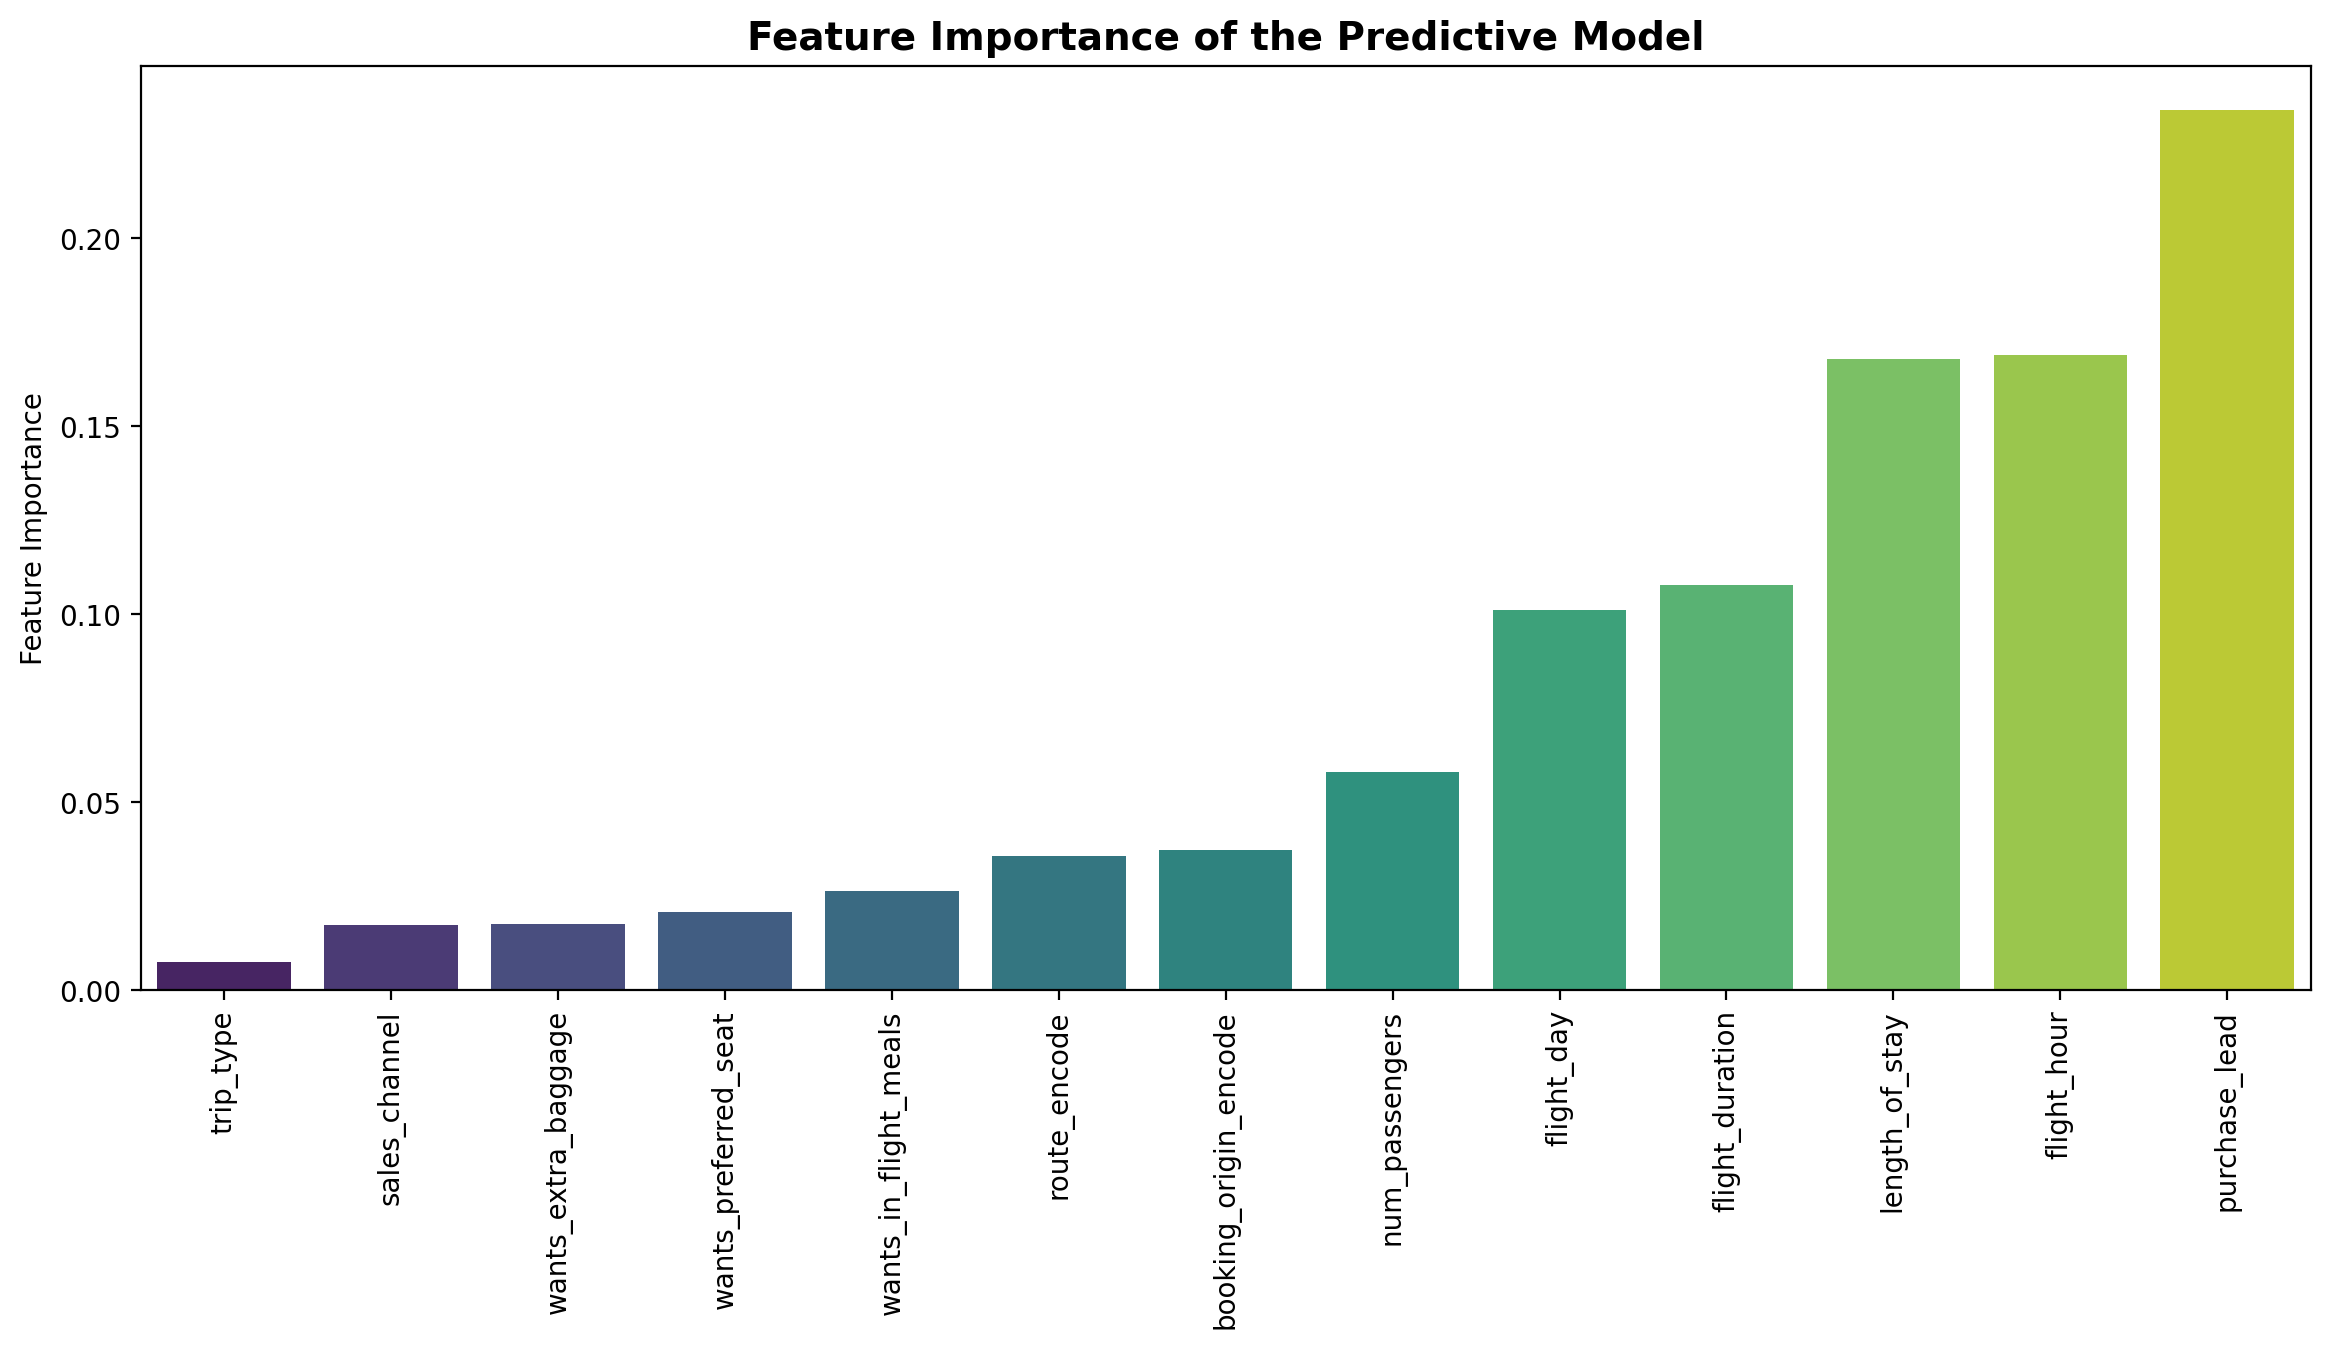

In [109]:
feat_imp = grid_rfc.best_estimator_.feature_importances_
feat_imp_df = pd.DataFrame(data = feat_imp, index=X.columns, columns=['Feature Importance'])



#Plot a graph of feature importance of the model

plt.figure(figsize=(14, 6), dpi= 200)
sns.barplot(data = feat_imp_df.sort_values('Feature Importance'), 
            x = feat_imp_df.sort_values('Feature Importance').index, y= 'Feature Importance',palette='viridis', an)
plt.xticks(rotation=90)
plt.title("Feature Importance of the Predictive Model", fontsize= 14, fontweight = 'bold')
plt.show()

In [128]:
feat_imp_df.sort_values(by='Feature Importance', ascending=False)

,Feature Importance
purchase_lead,0.234101
flight_hour,0.169008
length_of_stay,0.167958
flight_duration,0.107813
flight_day,0.100949
num_passengers,0.057900
booking_origin_encode,0.037303
route_encode,0.035654
wants_in_flight_meals,0.026220
wants_preferred_seat,0.020850


## Model Performance Evaluation 

In [77]:
pred = grid_rfc.predict(X_val_scaled)

In [117]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.93      0.51      0.66      6379
           1       0.22      0.78      0.34      1121

    accuracy                           0.55      7500
   macro avg       0.57      0.64      0.50      7500
weighted avg       0.82      0.55      0.61      7500

F2 Score for the Validation Dataset: 0.51


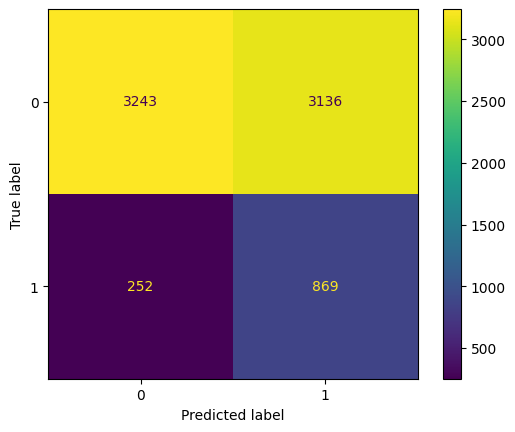

In [83]:
ConfusionMatrixDisplay.from_estimator(grid_rfc, X_val_scaled, y_val)

<Figure size 1280x960 with 0 Axes>

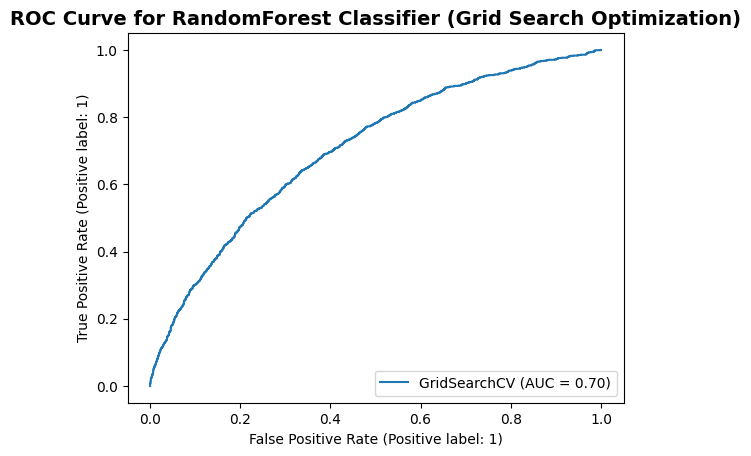

In [94]:
plt.figure(dpi =200)
RocCurveDisplay.from_estimator(grid_rfc, X_val_scaled, y_val)
plt.title("ROC Curve for RandomForest Classifier (Grid Search Optimization)", fontsize =14, fontweight='bold')
plt.show()



### Final Evaluation with Test Set 

In [119]:
print('Prediction on Test Data')
pred_test = grid_rfc.predict(X_test_scaled)
print(classification_report(y_test, pred_test))

Prediction on Test Data
              precision    recall  f1-score   support

           0       0.93      0.52      0.66      6378
           1       0.22      0.78      0.34      1122

    accuracy                           0.56      7500
   macro avg       0.58      0.65      0.50      7500
weighted avg       0.82      0.56      0.62      7500



<Figure size 2000x2000 with 0 Axes>

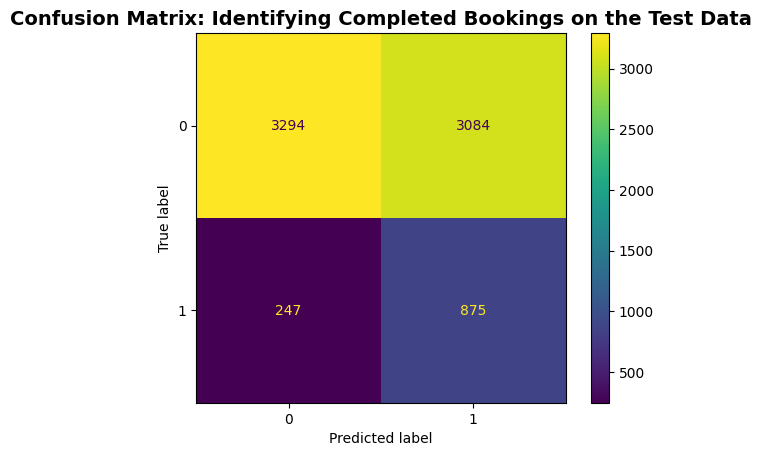

In [122]:
plt.figure(figsize=(10,10), dpi=200)
ConfusionMatrixDisplay.from_estimator(grid_rfc, X_test_scaled, y_test)
plt.title("Confusion Matrix: Identifying Completed Bookings on the Test Data", fontsize = 14, fontweight='bold')
plt.show()

**Interpretation:**
* Given the business goal of capturing as many completed bookings as possible, the high recall for Class 1 is beneficial. However, the model's precision for this class is low, leading to a significant number of false positives. Depending on the specific costs associated with false positives and false negatives, I may need to adjust the model, potentially exploring different features, model types, or additional techniques to handle class imbalance.

<Figure size 2000x2000 with 0 Axes>

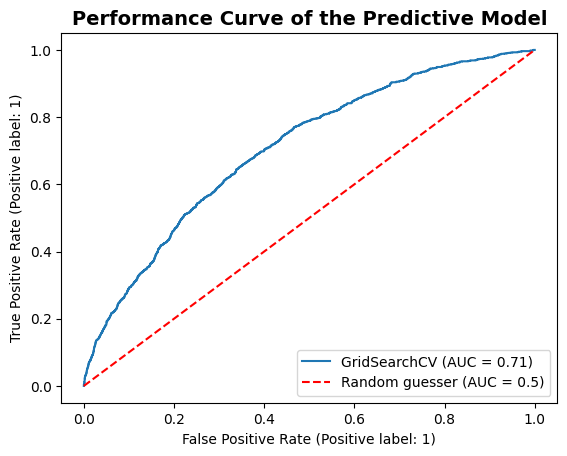

In [126]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,10), dpi=200)
RocCurveDisplay.from_estimator(grid_rfc, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guesser (AUC = 0.5)')
plt.title("Performance Curve of the Predictive Model", fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

## Project Summary

- **Objective:** Developed a model to predict customer booking completion for British Airways, with a focus on maximizing identification of true bookings.
- **ROC Analysis:** Achieved an AUC of 0.71, indicating a strong ability to differentiate between completed and non-completed bookings.
- **Data Imbalance:** Implemented strategies to handle severe class imbalances, optimizing for recall to align with business priorities.
- **Insights Gained:** 
  - Learned to navigate imbalanced datasets and the importance of precision-recall trade-offs.
  - Enhanced understanding of feature importance and model evaluation metrics.
  - **Gained proficiency in applying machine learning techniques to real-world business problems, specifically in the airline industry.**
  - Developed a deeper understanding of how to manipulate and prepare data to build effective predictive models.
- **Business Impact:** The model provides actionable insights to proactively engage customers and potentially increase booking completions.

